In [1]:
import os
from collections import namedtuple
from time import time

import numpy as np
import pandas as pd
from ortools.sat.python import cp_model
from matplotlib import pyplot as plt
from tqdm import tqdm

from src import dataset, config

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(config.RANDOM_SEED)

In [3]:
product_dataset = dataset.ProductDataset(
    "data/products.pkl",
    int(1e+6),
    config.pallet_lenght, 
    config.pallet_width, 
    config.max_product_height, 
    config.pallet_load,
    force_overload=True
)
product_dataset.products.head()

,lenght,width,height,weight
0,100,51,548,56
1,28,37,256,89
2,130,347,67,17
3,305,61,761,26
4,47,260,160,23


<IPython.core.display.Javascript object>


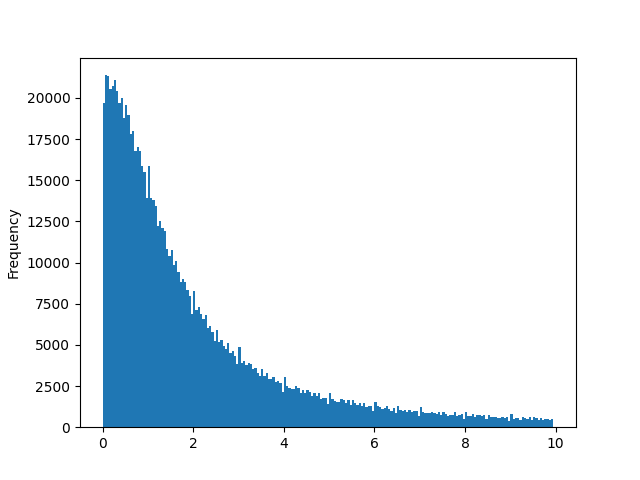

In [4]:
plt.figure()
(product_dataset.products.width / product_dataset.products.lenght).plot.hist(bins=np.arange(0, 10, 0.05));
plt.show()

<IPython.core.display.Javascript object>


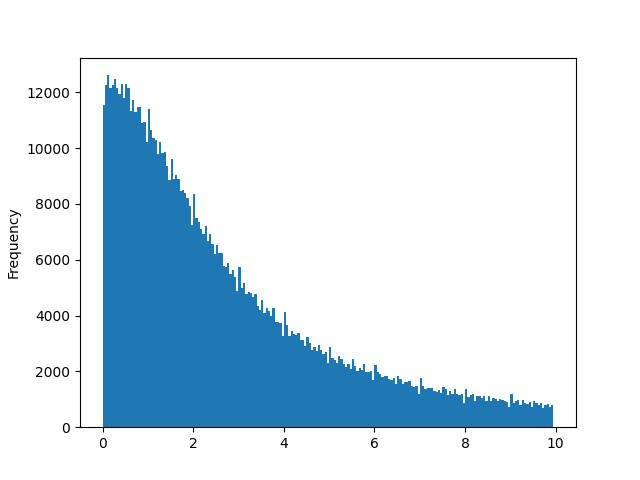

In [5]:
plt.figure()
(product_dataset.products.height / product_dataset.products.lenght).plot.hist(bins=np.arange(0, 10, 0.05));
plt.show()

<IPython.core.display.Javascript object>


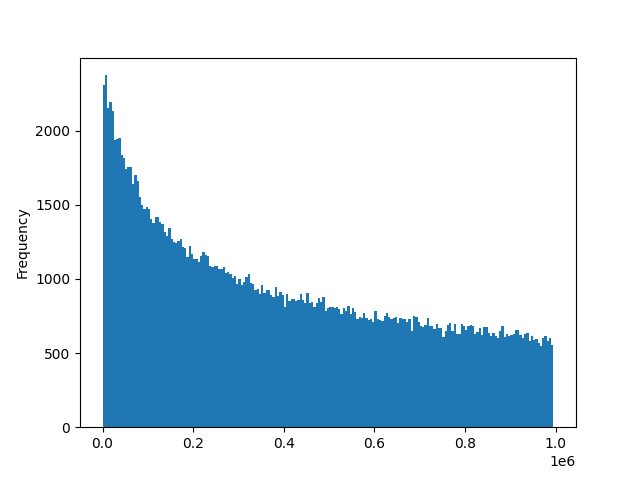

In [6]:
plt.figure()
(product_dataset.products.lenght * product_dataset.products.width * product_dataset.products.height).plot.hist(bins=np.arange(0, int(1e+6), 5000));
plt.show()

<IPython.core.display.Javascript object>


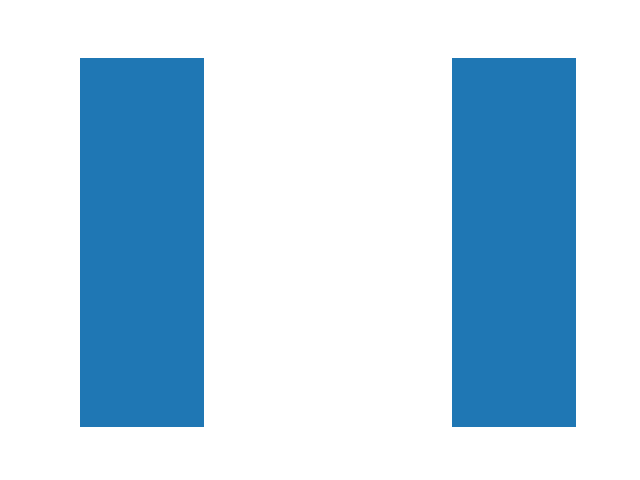

KeyboardInterrupt: 

In [8]:
plt.figure()
product_dataset.products[["lenght", "width", "height"]].value_counts().plot.bar()
plt.show()

In [15]:
product_dataset.products[["lenght", "width", "height"]].value_counts().to_frame().reset_index()

,lenght,width,height,0
0,5,20,73,3
1,54,45,10,3
2,37,62,7,3
3,196,180,136,3
4,153,253,110,3
...,...,...,...,...
997191,87,237,1083,1
997192,87,238,66,1
997193,87,238,74,1
997194,87,238,96,1
